### Import library and dataset

In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import plotly.express as px
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [34]:
heart_data = pd.read_csv('dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Exploratory data analysis

In [119]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [35]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [36]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Not null values

### DEATH_EVENT

In [95]:
fig = px.pie(heart_data,names='DEATH_EVENT', title='Death Event Ratio')
fig.show()

- From the above pie chart we can conclude that in our dataset 67.9% (203) pepole are Not Survived and 32.1% (96) are Survived.

### Age & Gender analysis

In [37]:
# age distribution

hist_data =[heart_data["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

- Age wise 40 to 80 the spread is High 
- less than 40 age and higher than 80 age people are very low

In [40]:
surv = heart_data[heart_data["DEATH_EVENT"]==0]["age"]
not_surv = heart_data[heart_data["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

- Survival is high on 40 to 70
- The spread of Not survival is going through all ages.

In [38]:
fig = px.box(heart_data, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female = 0")
fig.show()

In [39]:
male = heart_data[heart_data["sex"]==1]
female = heart_data[heart_data["sex"]==0]

male_survi = male[heart_data["DEATH_EVENT"]==0]
male_not = male[heart_data["DEATH_EVENT"]==1]
female_survi = female[heart_data["DEATH_EVENT"]==0]
female_not = female[heart_data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[heart_data["DEATH_EVENT"]==0]),len(male[heart_data["DEATH_EVENT"]==1]),
         len(female[heart_data["DEATH_EVENT"]==0]),len(female[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

In [41]:
fig = px.violin(heart_data, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()

Age Report

- Survival spread is high in age's flow of 40 to 70
- The Survival is high for both male between 50 to 60 and female's age between 60 to 70 respectively

In [42]:
fig = px.violin(heart_data, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Smoking on Survival Status")
fig.show()

- The Survival is high for not smoking person 55 to 65, while for smoking person it is between 50 to 60
- Death event for smoking person is high than not smoking person

In [43]:
fig = px.violin(heart_data, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Diabetes on Survival Status")
fig.show()

In [44]:
fig = px.histogram(heart_data, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [45]:
fig = px.histogram(heart_data, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [46]:
fig = px.histogram(heart_data, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [47]:
fig = px.histogram(heart_data, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [48]:
fig = px.histogram(heart_data, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=heart_data.columns)
fig.show()

### Distribution plots Survived and Not-Survived (Quantitative Variable)

#### Sodium

In [49]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_sodium']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status")
fig.show()

#### Serum Creatinine

In [50]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_creatinine']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Creatinine on Survival Status")
fig.show()

#### Ejaction Fraction

In [51]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['ejection_fraction']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Ejaction Fraction on Survival Status")
fig.show()

### Pie Charts (Quantitative Variable)


#### Diabetes

In [53]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = heart_data[heart_data['diabetes']==1]
diabetes_no = heart_data[heart_data['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

From the above pie chart we can conclude that in our dataset 58.2% (174) pepole are No Diabetes Person and 41.8% (125) are Diabetes Person.

In [54]:
fig = px.pie(heart_data, values='diabetes',names='DEATH_EVENT', title='Diabetes Death Event Ratio')
fig.show()

In [55]:
diabetes_yes_survi = diabetes_yes[heart_data["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[heart_data["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[heart_data["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[heart_data["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[heart_data["DEATH_EVENT"]==0]),len(diabetes_yes[heart_data["DEATH_EVENT"]==1]),
         len(diabetes_no[heart_data["DEATH_EVENT"]==0]),len(diabetes_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes")
fig.show()

- From above pie charts we can conclude that in our dataset diabetes from 174 of Non Diabetes person 118 are survived and 56 are not survived and
- From 125 Diabetes person 85 are survived, while 40 are not survived.

#### Anaemia

In [56]:
anaemia_yes = heart_data[heart_data['anaemia']==1]
anaemia_no = heart_data[heart_data['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Anaemia")
fig.show()

From the above pie chart we can conclude that in our dataset 56.9%(170) pepoles are Non anaemic pepoles, while 43.1%(129) are anaemic pepoles.

In [57]:
fig = px.pie(heart_data, values='anaemia',names='DEATH_EVENT', title='Anaemia Death Event Ration')
fig.show()

In [58]:
anaemia_yes_survi = anaemia_yes[heart_data["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[heart_data["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[heart_data["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[heart_data["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[heart_data["DEATH_EVENT"]==0]),len(anaemia_yes[heart_data["DEATH_EVENT"]==1]),
         len(anaemia_no[heart_data["DEATH_EVENT"]==0]),len(anaemia_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show()

- From above pie charts we can conclude that in our dataset diabetes from 170 of Non Anaemic person 120 are survived and 50 are not survived and
- From 129 Anaemic person 83 are survived, while 46 are not survived.

#### High Blood Pressure

In [59]:
hbp_yes = heart_data[heart_data['high_blood_pressure']==1]
hbp_no = heart_data[heart_data['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - High Blood Pressure")
fig.show()

From the above pie chart we can conclude that in our dataset 64.9%(194) pepoles are Non High BP pepoles, while 35.1%(105) are High BP pepoles.

In [60]:
fig = px.pie(heart_data, values='high_blood_pressure',names='DEATH_EVENT', title='High Blood Pressure Death Event Ratio')
fig.show()

In [61]:
hbp_yes_survi = hbp_yes[heart_data["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[heart_data["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[heart_data["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[heart_data["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[heart_data["DEATH_EVENT"]==0]),len(hbp_yes[heart_data["DEATH_EVENT"]==1]),
         len(hbp_no[heart_data["DEATH_EVENT"]==0]),len(hbp_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()

- From above pie charts we can conclude that in our dataset diabetes from 194 of Non High BP person 137 are survived and 57 are not survived and
- From 105 High BP person 66 are survived, while 39 are not survived.

#### Smoking

In [62]:
smoking_yes = heart_data[heart_data['smoking']==1]
smoking_no = heart_data[heart_data['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Smoking")
fig.show()

From the above pie chart we can conclude that in our dataset 67.9%(203) pepoles are Non Smoking pepoles, while 32.1%(96) are Smoking pepoles.

In [63]:
fig = px.pie(heart_data, values='smoking',names='DEATH_EVENT', title='Smoking Death Event Ratio')
fig.show()

In [64]:
smoking_yes_survi = smoking_yes[heart_data["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[heart_data["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[heart_data["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[heart_data["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[heart_data["DEATH_EVENT"]==0]),len(smoking_yes[heart_data["DEATH_EVENT"]==1]),
         len(smoking_no[heart_data["DEATH_EVENT"]==0]),len(smoking_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

- From above pie charts we can conclude that in our dataset diabetes from 203 of Non Smoking person 137 are survived and 66 are not survived and
- From 96 Smoking person 66 are survived, while 30 are not survived.

### Correlation


In [120]:
heart_data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


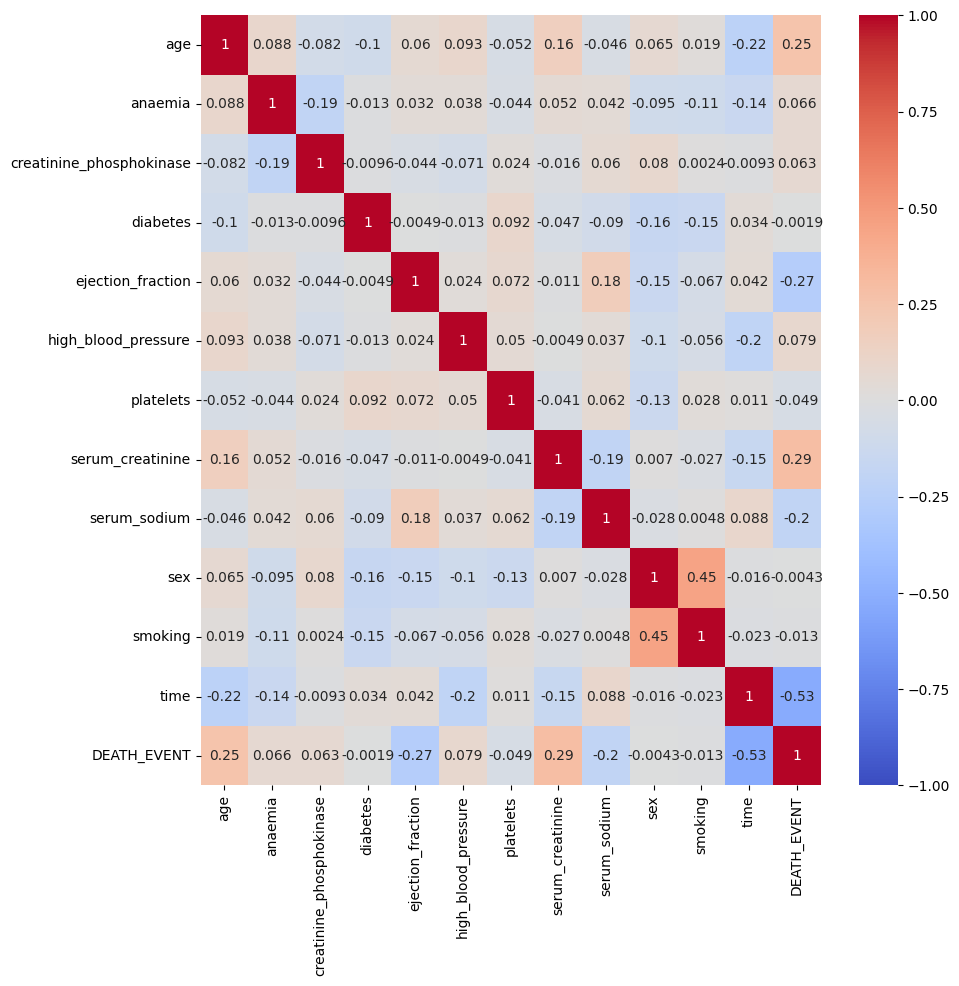

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(), vmin=-1, cmap='coolwarm', annot=True)

### Modeling

In [112]:
Features = ['time','ejection_fraction','serum_creatinine','serum_sodium','age']
x = heart_data[Features]
y = heart_data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [113]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


lr_train_score = lr.score(x_train, y_train)
lr_test_score= lr.score(x_test, y_test)

lr_pred = lr.predict(x_test)

print(f'LogisticRegressionModel Train Score is : {lr_train_score*100:.2f} %' )
print("----------------------------------------------------------------")
print(f'LogisticRegressionModel Test Score is : {lr_test_score*100:.2f} %')

LogisticRegressionModel Train Score is : 81.17 %
----------------------------------------------------------------
LogisticRegressionModel Test Score is : 90.00 %


#### Intercept & Coefficient of equation

In [114]:
itc = lr.intercept_[0]
print(f'Intercept : {itc}')

c = lr.coef_
print('coefficient :')
for i in range(len(x.columns)):
    print(f'\t{x.columns[i]:30} {c[0][i]}')

Intercept : 7.311217852743552
coefficient :
	time                           -0.018868622328573087
	ejection_fraction              -0.06586794245828516
	serum_creatinine               0.7354176289971321
	serum_sodium                   -0.05068330803839794
	age                            0.03920727405770244


#### Confusion Matrix

<Figure size 640x480 with 0 Axes>

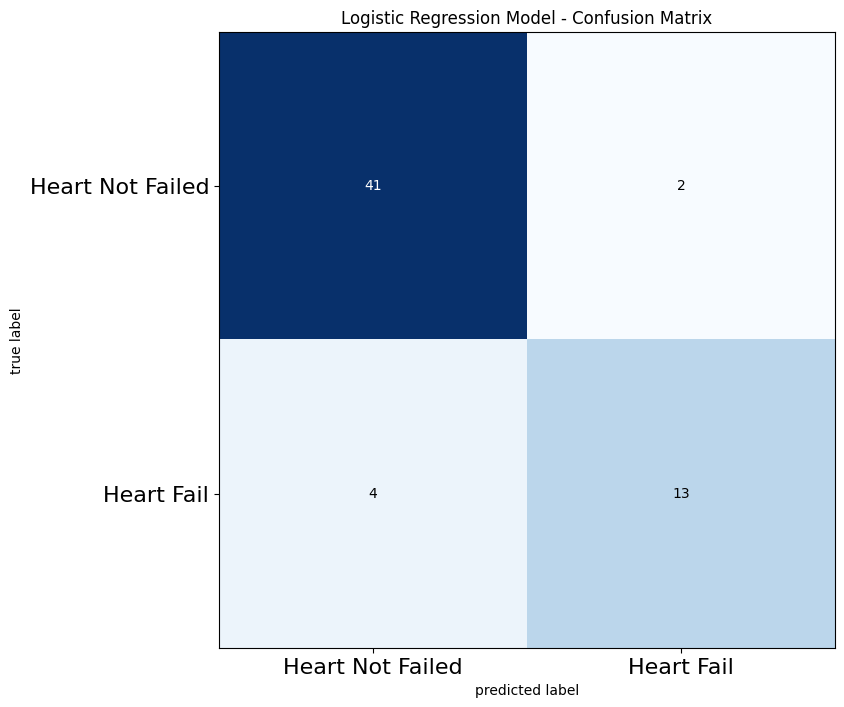

In [115]:
cm = confusion_matrix(y_test, lr_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [116]:
lr_acc = accuracy_score(y_test,lr_pred)
lr_precision = precision_score(y_test,lr_pred)
lr_recall = recall_score(y_test,lr_pred)


print(f'LogisticRegressionModel accuracy is : {lr_acc*100:.2f} %')
print("----------------------------------------------------------------")
print(f'LogisticRegressionModel precision is : {lr_precision*100:.2f} %')
print("----------------------------------------------------------------")
print(f'LogisticRegressionModel recall is : {lr_recall*100:.2f} %')
print("----------------------------------------------------------------")

LogisticRegressionModel accuracy is : 90.00 %
----------------------------------------------------------------
LogisticRegressionModel precision is : 86.67 %
----------------------------------------------------------------
LogisticRegressionModel recall is : 76.47 %
----------------------------------------------------------------


#### Probability of test data

In [123]:
y_pred_prob = lr.predict_proba(x_test)[:,1]
print(y_pred_prob.round(2))

[0.07 0.02 0.16 0.42 0.22 0.93 0.44 0.27 0.02 0.16 0.61 0.05 0.95 0.05
 0.22 0.03 0.02 0.24 0.31 0.09 0.91 0.3  0.9  0.18 0.52 0.66 0.03 0.02
 0.07 0.28 0.11 0.69 0.05 0.16 0.48 0.01 0.31 0.27 0.8  0.03 0.81 0.1
 0.17 0.06 0.19 0.8  0.09 0.03 0.03 0.25 0.93 0.32 0.98 0.52 0.31 0.94
 0.09 0.19 0.24 0.03]


In [ ]:
from tkinter.ttk import *
import tkinter as tk
import csv


col = list(heart_data.columns)
col.pop()
window = tk.Tk()
window.geometry("600x400")
window.title('Heart Failed Prediction')

anaemiaR = IntVar()
anmr1=Radiobutton(window, text="Yes", variable=anaemiaR, value=1).place(x=150,y=85)
anmr2=Radiobutton(window, text="No", variable=anaemiaR, value=0).place(x=190,y=85)

diabetesR = IntVar()
anmr1=Radiobutton(window, text="Yes", variable=diabetesR, value=1).place(x=140,y=165)
anmr2=Radiobutton(window, text="No", variable=diabetesR, value=0).place(x=180,y=165)

hbpR = IntVar()
anmr1=Radiobutton(window, text="Yes", variable=hbpR, value=1).place(x=100,y=245)
anmr2=Radiobutton(window, text="No", variable=hbpR, value=0).place(x=140,y=245)


sexR = IntVar()
anmr1=Radiobutton(window, text="Male", variable=sexR, value=1).place(x=360,y=165)
anmr2=Radiobutton(window, text="Female", variable=sexR, value=0).place(x=420,y=165)


smokingR = IntVar()
anmr1=Radiobutton(window, text="Yes", variable=smokingR, value=1).place(x=400,y=205)
anmr2=Radiobutton(window, text="No", variable=smokingR, value=0).place(x=440,y=205)

#label
age_label = tk.Label(window,
                text='age : ',
                font=('Arial',16))
age_label.place(x=40,y=40)

anaemia_label = tk.Label(window,
                text='anaemia : ',
                font=('Arial',16))
anaemia_label.place(x=40,y=80)

CPK_label = tk.Label(window,
                text='CPK : ',
                font=('Arial',16))
CPK_label.place(x=40,y=120)

diabetes_label = tk.Label(window,
                text='diabetes : ',
                font=('Arial',16))
diabetes_label.place(x=40,y=160)

EF_label = tk.Label(window,
                text='EF : ',
                font=('Arial',16))
EF_label.place(x=40,y=200)

BP_label = tk.Label(window,
                text='BP : ',
                font=('Arial',16))
BP_label.place(x=40,y=240)

platelets_label = tk.Label(window,
                text='platelets : ',
                font=('Arial',16))
platelets_label.place(x=300,y=40)

serum_creatinine_label = tk.Label(window,
                text='serum_creatinine : ',
                font=('Arial',16))
serum_creatinine_label.place(x=300,y=80)

serum_sodium_label = tk.Label(window,
                text='serum_sodium : ',
                font=('Arial',16))
serum_sodium_label.place(x=300,y=120)

sex_label = tk.Label(window,
                text='sex : ',
                font=('Arial',16))
sex_label.place(x=300,y=160)

smoking_label = tk.Label(window,
                text='smoking : ',
                font=('Arial',16))
smoking_label.place(x=300,y=200)

time_label = tk.Label(window,
                text='time : ',
                font=('Arial',16))
time_label.place(x=300,y=240)

prob_label = tk.Label(window,
                text=' Predicted : ',
                font=('Arial',16))
prob_label.place(x=40,y=300)

values = {"RadioButton 1" : 1,
          "RadioButton 2" : 0,}
def viewSelected(var):
    choice  = var.get()
    if choice == 0:
       return 0

    elif choice == 1:
       return 1
#entry
age_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
age_entry.place(x=100,y=40)


def viewSelected(var):
    choice  = var.get()
    if choice == 1:
       return

    elif choice == 2:
       output =  "Commerce"

CPK_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
CPK_entry.place(x=100,y=120)

EF_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
EF_entry.place(x=100,y=200)

platelets_entry = tk.Entry(window,
                font=('Arial',16),
                width=10)
platelets_entry.place(x=400,y=40)

serum_creatinine_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
serum_creatinine_entry.place(x=490,y=80)

serum_sodium_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
serum_sodium_entry.place(x=460,y=120)


time_entry = tk.Entry(window,
                font=('Arial',16),
                width=5)
time_entry.place(x=360,y=240)

#button
def click():
    inp=[]
    inp.append(int(age_entry.get()))
    inp.append(int(anaemiaR.get()))
    inp.append(float(CPK_entry.get()))
    inp.append(float(diabetesR.get()))
    inp.append(float(EF_entry.get()))
    inp.append(float(hbpR.get()))
    inp.append(float(platelets_entry.get()))
    inp.append(float(serum_creatinine_entry.get()))
    inp.append(float(serum_sodium_entry.get()))
    inp.append(float(sexR.get()))
    inp.append(float(smokingR.get()))
    inp.append(float(time_entry.get()))
    print(inp)
    with open('input.csv', 'w', encoding='UTF8') as f:
        wt = csv.writer(f)

        wt.writerow(col)

        wt.writerow(inp)
    # 
    user_data =pd.read_csv("input.csv")
    user_data_pd=user_data[Features]
    user_pred_prob = lr.predict_proba(user_data_pd)[:,1]
    print(user_pred_prob[0])
    prob_label.config(text='Predicted : '+str(round(user_pred_prob[0]*100,3))+' %')

    inp =[]

button = tk.Button(window,
                    text='Predict!!',
                    font=('Arial',16),
                    command=click)

button.place(x=400,y=300)

window.mainloop()